In [1]:
import numpy as np
from typing import *

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, Operator
sim = AerSimulator()

from util import zero, one, PlotGateOpOnBloch, plot_bloch_vector

# Foundations: Quantum Circuits for a Single Qubit System: Part 2

In this notebook, we will use the language of linear algebra to equivalently describe quantum circuits.

References
1. [Introduction to Classical and Quantum Computing: Chapter 2](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)

## Quantum Gates and Unitary Matrices

A quantum gate $G$ that acts on a single qubit system can be represented as a $2 \times 2$ **unitary matrix**. That is, $G \in \mathcal{U}(2)$ where $\mathcal{U}(n)$ is the collection of unitary matrices in $n$ dimensions. We'll start with an example using the Hadamard gate.

### Example: Hadamard Gate

The **unitary matrix**

$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

encodes the Hadamard gate. We'll characterize unitary matrix later.

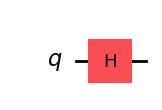

In [2]:
qc_H = QuantumCircuit(1)
qc_H.h(0)
qc_H.draw(output="mpl", style="iqp")

In [3]:
# This produces the unitary matrix
H = Operator(qc_H)
H.draw("latex")

<IPython.core.display.Latex object>

### Example: Z Gate

The unitary matrix

$$
Z = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
$$

encodes the $Z$ gate.

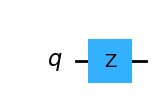

In [4]:
qc_Z = QuantumCircuit(1)
qc_Z.z(0)
qc_Z.draw(output="mpl", style="iqp")

In [5]:
Z = Operator(qc_Z)
Z.draw("latex")

<IPython.core.display.Latex object>

### Example: Phase Gate

We can also construct a phase gate that performs a rotation around the $Z$ axis on the Bloch sphere by $\lambda$ radians as in

$$
P(\lambda) = \begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda}
\end{pmatrix} \,.
$$

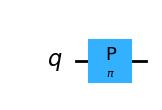

In [6]:
qc_p = QuantumCircuit(1)
qc_p.p(np.pi, 0)
qc_p.draw(output="mpl", style="iqp")

In [7]:
# A phase of 180 degrees is equivalent to a Z gate
def P(angle):
    qc_p = QuantumCircuit(1)
    qc_p.p(angle / 180 * np.pi, 0)
    return Operator(qc_p)
P(180).draw("latex")

<IPython.core.display.Latex object>

### Gate Application is Matrix Multiplication

The application of a gate $G$ to a qubit $|q\rangle$ is notated

$$
G |q\rangle
$$

and corresponds to the multiplication of the corresponding $2 \times 2$ unitary matrix to the quantum state encoded by $|q\rangle$.

#### Example

Below, we show by example that matrix multiplication and the evolution of a quantum state under a gate are equivalent.

In [8]:
print("Matrix multiplication", np.array(Operator(qc_H)) @ np.array(zero))
(zero.evolve(Operator(qc_H))).draw('latex')

Matrix multiplication [0.70710678+0.j 0.70710678+0.j]


<IPython.core.display.Latex object>

In [9]:
print("Matrix multiplication", np.array(Operator(qc_H)) @ np.array(one))
(one.evolve(Operator(qc_H))).draw('latex')

Matrix multiplication [ 0.70710678+0.j -0.70710678+0.j]


<IPython.core.display.Latex object>

## Unitary Matrix Review

Unitary matrices have two properties that are important for quantum computing:
1. invertible and
2. norm preservation.

### Invertibility and Reversibility

Every unitary matrix is **invertible**. As a reminder, this means that for any unitary matrix $U$, there exists another unitary matrix $U^{-1}$ such that

$$
U U^{-1} = U^{-1} U = I
$$

where $I$ is the identity matrix. This means that that quantum computations are **reversible**, since the application of a gate $U$ can always be undone by another gate $U^{-1}$.

In [10]:
# This demonstrates that H is its own inverse
(Operator(qc_H) @ Operator(qc_H)).draw("latex")

<IPython.core.display.Latex object>

#### Conjugate Transpose

For a unitary matrix, the inverse takes a special form: it is the **conjugate transpose**, i..e.,

$$
U^{-1} = U^\dagger \,.
$$

In [11]:
(P(30) @ np.conj(P(30)).T).draw("latex")

<IPython.core.display.Latex object>

### Norm Preservation and Quantum Circuits

Every unitary matrix **preserves the norm** of the input vector. In symbols,

$$
\lVert U x \rVert = \lVert x \rVert \,.
$$

In [12]:
# This demonstrates that H preserves the norm
np.linalg.norm(zero), np.linalg.norm(np.array(Operator(qc_H)) @ np.array(zero))

(1.0, 0.9999999999999999)

#### Sequencing Gates

The direct consequence of norm preservation is that applying a quantum gate to a single qubit produces an output that is also a qubit. This means that we can sequence the application of quantum gates to form a quantum computation as a quantum circuit. As a reminder, consider the circuit where we apply $H$ followed by a $Z$.

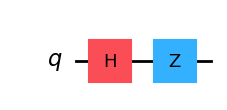

In [13]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.draw(output="mpl", style="iqp")

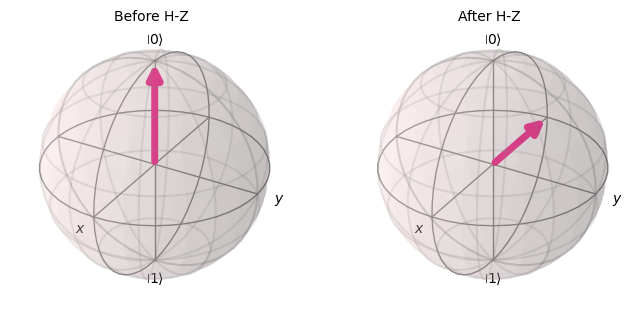

In [14]:
with PlotGateOpOnBloch() as ctx:
    plot_bloch_vector(zero, ax=ctx.ax1, title="Before H-Z")
    plot_bloch_vector(zero.evolve(Operator(qc)), ax=ctx.ax2, title="After H-Z")

We can write the quantum circuit above using matrix multiplication as in

\begin{align*}
|q_\text{output}\rangle & = ZH|0\rangle \tag{definition of circuit} \\
& = ZH \begin{pmatrix}
1 \\
0
\end{pmatrix} \tag{substitute $|0\rangle$} \\
& = Z 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} \tag{substitute $H$} \\
& = Z \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \tag{matrix multiplication} \\
& = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \tag{substitue $Z$} \\
& = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \tag{matrix multiplication} \,. \\
\end{align*}

Norm preservation ensures that
1. $\lVert H|0\rangle \rVert = \lVert |0\rangle \rVert$ and
2. $\lVert Z(H|0\rangle) \rVert = \lVert H|0\rangle \rVert$.

Since $\lVert |0\rangle \rVert = 1$, we have that $\lVert Z(H|0\rangle) \rVert = 1$ as well, so we have a valid quantum state.

In [15]:
# Initial
zero.draw("latex")

<IPython.core.display.Latex object>

In [16]:
# Apply H
q1 = zero.evolve(H)
q1.draw("latex")

<IPython.core.display.Latex object>

In [17]:
# Apply Z
q_after = q1.evolve(Z)
q_after.draw("latex")

<IPython.core.display.Latex object>

#### Aisde: Order of H and Z

It may seem odd that the circuit is read left-to-right but the application of matrix multiplication was from right-to-left. However, forgetting quantum computation for a moment and considering in ordinary programming how we might apply $H$ to an input, and then $Z$, we'll recognize that the order should be right-to-left.

In [18]:
def Z(x):
    return 2 * x

def H(x):
    return x + 1

print("Incorrect order for applying H, then Z:", H(Z(1)))
print("Correct order for apply H, then Z, is right-to-left:", Z(H(1)))

Incorrect order for applying H, then Z: 3
Correct order for apply H, then Z, is right-to-left: 4


#### Sequencing Gates corresponds to Matrix Multiplication

Alternatively, we can simplify the sequence of gate applications to a single "gate" by multiplying all the gates together. For example,

\begin{align*}
ZH & = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix} \\
& = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
-1 & 1
\end{pmatrix} \,.
\end{align*}

The quantum state can then be calculated as

\begin{align*}
|q_\text{output}\rangle & = ZH|0\rangle \tag{definition of circuit} \\
& = ZH \begin{pmatrix}
1 \\
0
\end{pmatrix} \tag{substitute $|0\rangle$} \\
& = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
-1 & 1
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} \tag{substitute $ZH$} \\
& = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \tag{matrix multiplication}
\end{align*}

In [19]:
H = Operator(qc_H)
Z = Operator(qc_Z)

ZH = Z @ H
ZH.draw("latex")

<IPython.core.display.Latex object>

In [20]:
# Apply ZH
zero.evolve(Z @ H).draw("latex")

<IPython.core.display.Latex object>

#### Reversibility and Sequencing

As we might guess, we can reverse the computation a sequence of gates performs by applying the inverse of each gate in reverse order.

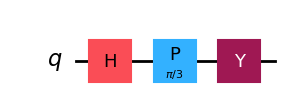

In [21]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(np.pi / 3, 0)
qc.y(0)
qc.draw(output="mpl", style="iqp")

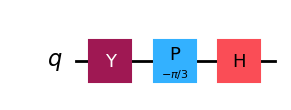

In [22]:
qc_rev = QuantumCircuit(1)
qc_rev.y(0)               # Y is it's own inverse
qc_rev.p(-np.pi / 3, 0)   # Rotate the other direction
qc_rev.h(0)               # H is it's own inverse
qc_rev.draw(output="mpl", style="iqp")

In [23]:
(Operator(qc) @ Operator(qc_rev)).draw("latex")

<IPython.core.display.Latex object>

## Gate-Based Quantum Computing

1. In classical computation, we could encode an arbitrary truth table with circuits formed from a preselected set of gates (nand gates).
2. Similarly in **gate-based quantum computing**, we would try to encode an arbitrary transformation on a quantum state with quantum circuits from a preselected set of gates. In order to do this, we will need a **universal gate set**.

## Summary

1. We reviewed the connection between $2 \times 2$ unitary matrices and gates that act on a single qubit system.
2. We saw that every quantum computation was reversible.
3. The preservation of norm ensures that we can sequence the application of quantum gates to form a quantum circuit.